In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import re

headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36',
}

# 建立各項清單
News_Link = []
News_Title = []
News_Type = []
News_Date = []
News_Time = []
News_Content = []
News_ID = []

start_time = time.time()

# 爬取新聞網頁資訊，只爬前200頁
for i in range(1,201):
    url = 'https://www.ettoday.net/news_search/doSearch.php?keywords=芭樂&idx=1&page=' + str(i)
    res = requests.get(url=url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    print('====== 第 ' + str(i) + ' 頁 ======')
    
    for j in range(0, len(soup.select('div[class=box_2]'))):
        try:
            # 取新聞標題
            title = soup.select('div[class=box_2]')[j].select('h2 a')[0].text
            News_Title.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', title))
            print(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', title))
            
            # 取網址
            link = soup.select('div[class=box_2]')[j].select('h2 a')[0]["href"]
            News_Link.append(link)
            print(link)
            
            # 建立ID
            news_id = soup.select('div[class=box_2]')[j].select('h2 a')[0]["href"].split('/')[5].split('.')[0]
            News_ID.append(news_id)
            print(news_id)
            
            # 取新聞類型
            news_type = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[0]
            News_Type.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_type))
#             print(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_type))
            
            # 取發布日期
            news_date = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[2]
            News_Date.append(news_date)
#             print(news_date)
            
            # 取發布時間
            news_time = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[3]
            News_Time.append(re.sub('[-_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_time))
#             print(re.sub('[-_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_time))
            
            # 取新聞內容
            page_res = requests.get(url=link, headers=headers)
            page_soap = BeautifulSoup(page_res.text, 'html.parser')

            for content in page_soap.select('div[class="story"]'):
                try:
                    News_Content.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', ' ', content.text))
                except:
                    pass
            for content in page_soap.select('div[class="story lazyload"]'):
                try:
                    News_Content.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', ' ', content.text))
                except:
                    pass
            
        except:
            pass
        
        sleep_time = random.randint(5,10)
        print("sleep time: %s sec"%(sleep_time))
        print('==========')
        time.sleep(sleep_time)
        
print("--- spend %s seconds ---" % (time.time() - start_time))
print('共爬取' + str(len(News_Title)) + '則新聞')

====== 第 1 頁 ======
王淨與勘吉在家躺整天喊自律這個世上唯一能夠影響你的人就是自己
https://www.ettoday.net/news/20210805/2046779.htm
2046779
sleep time: 9 sec
檸檬不是最多！維生素C水果排行曝營養師大推這款酸≠含量高
https://www.ettoday.net/news/20210804/2047626.htm
2047626
sleep time: 10 sec
工地主任租樓中樓挖狗洞打造武器密室看門打掃的也慘了
https://www.ettoday.net/news/20210804/2048036.htm
2048036
sleep time: 10 sec
《俗女2》大表姊爬山也穿高跟鞋天心笑奇葩最喜歡俗氣的故事
https://www.ettoday.net/news/20210803/2046841.htm
2046841
sleep time: 5 sec
最近掉髮嚴重要留意！營養師曝缺鐵症狀補鐵搭配3水果效果好
https://www.ettoday.net/news/20210803/2046801.htm
2046801
sleep time: 10 sec
秒飛泰國！台北道地泰主廚料理羅勒香打拋雞鹹中帶辣超下飯
https://www.ettoday.net/news/20210801/2037945.htm
2037945
sleep time: 10 sec
女團鼓手打敗魔王料理職人泰式便當讓林又立飛到泰國
https://www.ettoday.net/news/20210731/2042399.htm
2042399
sleep time: 10 sec
AZ打完半天像餓死鬼投胎苦主哭胖5kg！醫也傻最詭異副作用
https://www.ettoday.net/news/20210728/2042140.htm
2042140
sleep time: 10 sec
抹茶控必訪！網友激推汐止隱層版千層還有蛋糕買3送一好康優惠
https://www.ettoday.net/news/20210726/2036031.htm
2036031
sleep time: 6 sec
我不需要男友來完整人生10句《花邊教主》給女孩的霸氣愛情金句
ht

sleep time: 10 sec
東森農場推出雲林金鑽鳳梨王令麟送50%東森幣挺小農
https://www.ettoday.net/news/20210519/1986174.htm
1986174
sleep time: 6 sec
只有飼料？2貪吃汪眼瞇成圓點超哀怨當本汪吃素！
https://www.ettoday.net/news/20210519/1985301.htm
1985301
sleep time: 8 sec
你可能不知道的5個防曬真相！吃對食物也有能助防曬
https://www.ettoday.net/news/20210516/1981403.htm
1981403
sleep time: 8 sec
從房間看見彩虹橫跨101！住大人味的台北遠東飯店還能到對街聽演唱
https://www.ettoday.net/news/20210515/1981787.htm
1981787
sleep time: 10 sec
營養師曝讓新冠疫苗效果更好的5種食物！還有5大NG事項要小心
https://www.ettoday.net/news/20210513/1980497.htm
1980497
sleep time: 10 sec
月經後必吃！婦產醫激推6補鐵食物…海苔＞紅豆含量多7倍
https://www.ettoday.net/news/20210512/1977097.htm
1977097
sleep time: 5 sec
翁章梁6度上東森農場賣極光哈密瓜王令麟送回饋換算一顆僅238元火速秒殺
https://www.ettoday.net/news/20210512/1980022.htm
1980022
sleep time: 7 sec
壯麗山巒盡收眼底！台中武陵露營區必小拍木屋倒映水面超夢幻
https://www.ettoday.net/news/20210512/1973998.htm
1973998
sleep time: 10 sec
麥當勞隱藏好物只要39元！老饕員工餐必點
https://www.ettoday.net/news/20210509/1977650.htm
1977650
sleep time: 10 sec
====== 第 9 頁 ======
60款保健食品服用時間大解密！專家B群睡

sleep time: 9 sec
明天衝！可不可最新聯名飲品來了靜岡抹茶尬百香果巧克力超欠喝
https://www.ettoday.net/news/20210330/1949418.htm
1949418
sleep time: 6 sec
牽絲起司炸辣椒入菜！美式餐廳新推12道視覺系美食用餐再抽iPhone 12
https://www.ettoday.net/news/20210329/1949090.htm
1949090
sleep time: 8 sec
吃青椒芭樂能防黑色素沉澱長黑斑？營養師盤點4大營養素抗斑
https://www.ettoday.net/news/20210329/1948347.htm
1948347
sleep time: 5 sec
甘梅芭樂檸檬愛玉變身手搖杯！茶湯會最新芭樂檸檬系列登場
https://www.ettoday.net/news/20210329/1948573.htm
1948573
sleep time: 8 sec
飲食高油高糖高鹽恐爆血管！5大清血管食物曝光
https://www.ettoday.net/news/20210326/1942659.htm
1942659
sleep time: 8 sec
越白越有鬼！免洗筷吃之前先燙過4類陷阱物漂白劑全下肚
https://www.ettoday.net/news/20210325/1944706.htm
1944706
sleep time: 6 sec
快找室友逛好市多！住宿妹曝必買5大美食CP值破表平分超便宜
https://www.ettoday.net/news/20210325/1945964.htm
1945964
sleep time: 8 sec
阿兵哥買飲料大喊我要腦殘！店員憋笑下秒見1動作忍不住了
https://www.ettoday.net/news/20210324/1945291.htm
1945291
sleep time: 8 sec
====== 第 16 頁 ======
掉髮臉慘白…想要好氣色！營養師激推補鐵5湯品豬血熱量超低
https://www.ettoday.net/news/20210323/1941657.htm
1941657
sleep time: 7 sec
桃園鐵玫瑰熱音賞熱烈報名中副市

臉上討人厭小肉芽好困擾跟著這樣做很快就會消失
https://www.ettoday.net/news/20210206/1762207.htm
1762207
sleep time: 8 sec
刪Q一階達標！台灣基進分析4大影響將用全黨力量捍衛
https://www.ettoday.net/news/20210205/1915456.htm
1915456
sleep time: 5 sec
東森購物前進迪化街live直播黃珊珊首獻外景處女秀帶路辦年貨
https://www.ettoday.net/news/20210204/1914791.htm
1914791
sleep time: 6 sec
金球獎入圍名單／黑豹遺作搶影帝！史上首次3位女導演提名
https://www.ettoday.net/news/20210203/1913964.htm
1913964
sleep time: 9 sec
被騙了！果乾vs新鮮水果熱量PK…網嚇傻以前還自己嗑光整包
https://www.ettoday.net/news/20210203/1912577.htm
1912577
sleep time: 6 sec
東森購物2/4前進迪化街live直播跟著黃珊珊一起辦年貨
https://www.ettoday.net/news/20210203/1913867.htm
1913867
sleep time: 10 sec
台灣好媳婦拜神2堅持驚曝鐵齒朋友慘況他就是活該
https://www.ettoday.net/news/20210203/1913237.htm
1913237
sleep time: 8 sec
樂團主唱窮到吃1年吐司EP慘遭臉書禁冤望喊話馬克祖你怎麼了
https://www.ettoday.net/news/20210201/1912091.htm
1912091
sleep time: 8 sec
====== 第 23 頁 ======
吹風機吹身體解決全身病症這些起火風險要避開
https://www.ettoday.net/news/20210131/1905034.htm
1905034
sleep time: 8 sec
招牌冠軍薯條超好吃！台式歐風餐酒館必吃5分牛排＋花生辣醬
https://www.ettoday.ne

sleep time: 9 sec
芭樂伯罹癌插鼻胃管無法叫賣每天清晨5點準時擺攤養活自己
https://www.ettoday.net/news/20201204/1869440.htm
1869440
sleep time: 5 sec
南寮漁港爆坑殺？霸氣人夫喊就要大的海產店闆娘還原現場
https://www.ettoday.net/news/20201204/1869352.htm
1869352
sleep time: 10 sec
淡水埔里鹽埕都入選！國旅玩不膩百大經典小鎮玩法曝
https://www.ettoday.net/news/20201204/1869281.htm
1869281
sleep time: 6 sec
落髮毀顏值！6大類養髮食物吃起來遠離白髮禿頭危機
https://www.ettoday.net/news/20201203/1867946.htm
1867946
sleep time: 7 sec
中文系網友多益860！想接案翻譯6hrs只能賺1千元傻眼超低薪
https://www.ettoday.net/news/20201202/1867578.htm
1867578
sleep time: 7 sec
最有錢／逢拉回買準沒錯？集團股作帳行情撈20%不難？
https://www.ettoday.net/news/20201202/1867307.htm
1867307
sleep time: 7 sec
骨折只懂吃鈣片？草莓蛋黃超狂補鈣清單曝咖啡菸全戒啦
https://www.ettoday.net/news/20201202/1866538.htm
1866538
sleep time: 8 sec
====== 第 30 頁 ======
不需挨餓！7個技巧瘦身神助攻原來餐具也大有關係
https://www.ettoday.net/news/20201130/1865457.htm
1865457
sleep time: 7 sec
不能喝牛奶補鈣營養師吃這些也能！
https://www.ettoday.net/news/20201129/1865326.htm
1865326
sleep time: 5 sec
蝦味爆濃厚！隱身餐酒館的銷魂拉麵超特別竹炭炸雞軟嫩多汁
https://www.ettod

走進華夏龍脈／這座小鎮奇異果年產25萬噸神秘品種切開是紅心的！
https://www.ettoday.net/news/20200919/1812458.htm
1812458
sleep time: 8 sec
好兄弟放完暑假！鬼門關勿拜香蕉李子荔枝鳳梨禁忌內幕曝
https://www.ettoday.net/news/20200916/1810072.htm
1810072
sleep time: 6 sec
不用餓肚子！2週速瘦3kg懶人法專家強推這1杯真的有效
https://www.ettoday.net/news/20200914/1807529.htm
1807529
sleep time: 8 sec
嬰兒床二手價4千！她嗆3千元一句話網揭高手套路低買高售
https://www.ettoday.net/news/20200914/1808607.htm
1808607
sleep time: 7 sec
山區持續搜捕越獄逃犯白河警大規模清山護果守護民眾安全
https://www.ettoday.net/news/20200914/1808451.htm
1808451
sleep time: 6 sec
運動補水含糖助血糖穩定！台大物治師開運動菜單增強免疫力
https://www.ettoday.net/news/20200912/1807064.htm
1807064
sleep time: 9 sec
影／限時3周！珍煮丹打造用喝的挫冰手搖飲黑糖珍珠罪惡泰奶還加了仙草
https://www.ettoday.net/news/20200911/1806667.htm
1806667
sleep time: 8 sec
====== 第 37 頁 ======
賣假醫療口罩豪品老闆被爆開瑪莎拉蒂！鄰居他常換中古車
https://www.ettoday.net/news/20200911/1806600.htm
1806600
sleep time: 5 sec
柯文哲大方坦承我們就4％黨沒什麼好奇怪的
https://www.ettoday.net/news/20200910/1806080.htm
1806080
sleep time: 9 sec
五月天為什麼紅到現在？網曝致命吸引力去聽歌就知道
https://www.ettoda

sleep time: 7 sec
血冰魚冰水果冰都有北市動物園給動物另類消暑聖品
https://www.ettoday.net/news/20200722/1766519.htm
1766519
sleep time: 6 sec
熱到炸！動物園準備血冰水果冰鬣狗舔到一滴不剩
https://www.ettoday.net/news/20200722/1766404.htm
1766404
sleep time: 9 sec
影／曾被黑吃黑毒梟屯13顆手榴彈想報仇跨年煙火聲中試爆成功
https://www.ettoday.net/news/20200721/1765946.htm
1765946
sleep time: 10 sec
17道精緻料理放進整隻龍蝦！米其林一星山海樓外帶餐盒再推豪華升級版
https://www.ettoday.net/news/20200721/1766085.htm
1766085
sleep time: 6 sec
第一屆宜蘭勁好TOP10 好食好物好所在出爐美食令老饕驚艷
https://www.ettoday.net/news/20200721/1766021.htm
1766021
sleep time: 8 sec
青汁尬出盛夏手搖飲口味清爽！鮮茶道菠派系列新上市
https://www.ettoday.net/news/20200715/1753576.htm
1753576
sleep time: 8 sec
南投火龍果1袋100自己拿！老闆苦笑農場工作太忙一整天結果驚呆了
https://www.ettoday.net/news/20200714/1759881.htm
1759881
sleep time: 8 sec
====== 第 44 頁 ======
蔡凡熙等3年才見到爸爸拿刀秀切工嚇壞李李仁
https://www.ettoday.net/news/20200714/1760196.htm
1760196
sleep time: 6 sec
影／快閃2周！珍煮丹X小時候冰菓室邪惡聯名冰放了整顆手工奶酪古早冬瓜凍
https://www.ettoday.net/news/20200714/1759496.htm
1759496
sleep time: 5 sec
真實版嵌合蟻全身刺戰力超強他狂被後腿夾

sleep time: 9 sec
吃水果減肥＝嗑45顆方糖！醫激推低GI值Top3不甜不代表含糖量低
https://www.ettoday.net/news/20200607/1728807.htm
1728807
sleep time: 10 sec
後防疫時期變農特產代銷兼觀光陳時中倡樂活6縣市輪流跑
https://www.ettoday.net/news/20200607/1729922.htm
1729922
sleep time: 8 sec
神解析支持者早垮光關鍵！醫師細數脫序事跡嘆吹脹的氣球爆很快
https://www.ettoday.net/news/20200606/1731695.htm
1731695
sleep time: 9 sec
守護夏日紅寶石南警啟動鷹眼護果
https://www.ettoday.net/news/20200606/1731397.htm
1731397
sleep time: 6 sec
無負擔！蘭餐廳捨去濃厚醬汁初夏菜單改以蔬菜澄清湯為基底
https://www.ettoday.net/news/20200605/1731207.htm
1731207
sleep time: 10 sec
維生素A大贏蘋果！芒果護膚顧眼好處多專家吃多小心過敏
https://www.ettoday.net/news/20200605/1729808.htm
1729808
sleep time: 8 sec
楊斯棓大盤點韓國瑜如何敗光支持者犀利文勸別再做89萬票美夢了
https://www.ettoday.net/news/20200605/1730737.htm
1730737
sleep time: 10 sec
====== 第 51 頁 ======
王令麟送3千萬東森自然美保養品挺醫護！仁愛院長大讚體貼入心
https://www.ettoday.net/news/20200604/1730161.htm
1730161
sleep time: 10 sec
Albee范乙霏背帶卡溝渾圓胸型全看光！中空裝逛西門町太辣…鮪魚我不行了
https://www.ettoday.net/news/20200603/1729148.htm
1729148
sleep time: 10 sec
竟然連檸檬水也不宜！生理

sleep time: 7 sec
愛貓確診肺腺癌！她親送火化曝養病歷程是甜蜜的負擔
https://www.ettoday.net/news/20200331/1680554.htm
1680554
sleep time: 9 sec
2汪廝殺橘貓戰況超激烈！半甲貓見分身受害石化嚇傻
https://www.ettoday.net/news/20200331/1681072.htm
1681072
sleep time: 7 sec
黑嚕汪越洗越白…1年後露真面目變詐騙綿羊網用到去漬霸
https://www.ettoday.net/news/20200331/1680527.htm
1680527
sleep time: 10 sec
汪異常暴跳狠吠3次！起床見鋁窗位移險發生憾事嚇壞媽
https://www.ettoday.net/news/20200331/1680436.htm
1680436
sleep time: 9 sec
起床聞到狗味…置物櫃突竄出惡鄰居夜宿！囂張睡姿萌翻苦主
https://www.ettoday.net/news/20200331/1680525.htm
1680525
sleep time: 6 sec
客人脫光鞋量視力！柯基寶寶被臭暈軟癱地嚇壞網
https://www.ettoday.net/news/20200330/1680205.htm
1680205
sleep time: 6 sec
====== 第 58 頁 ======
提早餐路過！胖橘賊埋伏火影猛追苦主急逃命嚇慘
https://www.ettoday.net/news/20200330/1679662.htm
1679662
sleep time: 7 sec
硬闖廁所陪棒賽！跟屁貓聞濃厚毒氣秒癱地求留命
https://www.ettoday.net/news/20200330/1680051.htm
1680051
sleep time: 6 sec
奴才邀戰OOXX！聰明貓2次聽牌用猛招奪勝驚呆網
https://www.ettoday.net/news/20200330/1679609.htm
1679609
sleep time: 5 sec
10kg寶寶熱情狂蹭！厭世貓超寵妹液體悄溜網讚爆
https://www.ettoday.net/ne

sleep time: 8 sec
影／愛犬異常吠叫滿嘴口水迎飼主返家！見重摔影像痛哭失聲
https://www.ettoday.net/news/20200316/1668692.htm
1668692
sleep time: 9 sec
老公說要早點睡！小三貼胸搶床位閃瞎正宮我去隔壁房
https://www.ettoday.net/news/20200316/1668344.htm
1668344
sleep time: 8 sec
帥汪胸前毛炸裂魅力激增仰天賊笑！網笑想埋胸蹭一波
https://www.ettoday.net/news/20200316/1668335.htm
1668335
sleep time: 5 sec
中風嬤離開2年臘腸犬每天守輪椅思念！憂愁不忘祖孫情
https://www.ettoday.net/news/20200316/1668345.htm
1668345
sleep time: 10 sec
約克夏萌腿狂奔！柔順長毛飄起小臉遮不住網讚超高級拖把
https://www.ettoday.net/news/20200315/1668200.htm
1668200
sleep time: 6 sec
====== 第 65 頁 ======
奴才忙滑手機！橘貓遭無視怒鑽神秘黑洞變袋鼠寶寶討關注
https://www.ettoday.net/news/20200315/1668173.htm
1668173
sleep time: 10 sec
紗門突狂晃！驚見半甲癡漢破門找妹子網笑頭都伸進來了
https://www.ettoday.net/news/20200315/1667886.htm
1667886
sleep time: 5 sec
67kg高山犬攤油肚討抱！爸使勁扛結局超悲劇該買護腰了
https://www.ettoday.net/news/20200315/1667875.htm
1667875
sleep time: 10 sec
曾遭退養2次！柴有陰影不敢睡暖爸陪睡客廳同款翻肚融化網
https://www.ettoday.net/news/20200315/1667873.htm
1667873
sleep time: 10 sec
小貓電量不足！戳到黑色按鍵唐突下線網笑保險絲燒壞
https://

辯論會大爆走…韓國瑜臉書拉票這是一場熱呼呼民心與青筍筍民調對決
https://www.ettoday.net/news/20191229/1613194.htm
1613194
sleep time: 7 sec
辯論會／宋楚瑜提國情報告蔡英文沒有問題只要立法院邀請我就去
https://www.ettoday.net/news/20191229/1613073.htm
1613073
sleep time: 10 sec
辯論會／蔡英文是布袋戲韓國瑜若癌細胞清除人民可以投票給民進黨
https://www.ettoday.net/news/20191229/1613056.htm
1613056
sleep time: 9 sec
韓流大勢男團ASTRO首訪台南開唱台南美食留下美好印象
https://www.ettoday.net/news/20191229/1613070.htm
1613070
sleep time: 6 sec
====== 第 72 頁 ======
珍蜜11號有如綠寶石梁立定奪高樹蜜棗節評鑑冠軍
https://www.ettoday.net/news/20191228/1612617.htm
1612617
sleep time: 8 sec
草莓巨無霸多多瓶台中也有！拾覺2分店6口味限量上市
https://www.ettoday.net/news/20191228/1612621.htm
1612621
sleep time: 5 sec
台灣芭樂要去美國了！黃偉哲與AIT分處長見證歷史性一刻
https://www.ettoday.net/news/20191227/1612044.htm
1612044
sleep time: 9 sec
台下粉絲橫跨2世代樂團主唱激動喊人生值得了！
https://www.ettoday.net/news/20191226/1611219.htm
1611219
sleep time: 10 sec
Albee范乙霏開扣露內搭主持尾牙！巨胸正中間挖洞位置羞爆壞壞～
https://www.ettoday.net/news/20191226/1610965.htm
1610965
sleep time: 7 sec
2020跨年演唱會完整懶人包！999秒煙火＋追星地圖五月天尬SJ嗨瘋台灣
h

咖哩飯加點黑胡椒不只好吃還能預防乳癌10種意想不到的食物組合
https://www.ettoday.net/news/20191107/1574229.htm
1574229
sleep time: 7 sec
騎機車遇爛路坑噴飛50米！彰化高三夜校生打工遇險頭部重創昏迷指數3
https://www.ettoday.net/news/20191107/1574273.htm
1574273
sleep time: 8 sec
台南芭樂輸美積極布局黃偉哲出席台灣番石榴外銷平台論壇
https://www.ettoday.net/news/20191106/1573898.htm
1573898
sleep time: 8 sec
香水誤認成珍珠果農被控偷竊60斤芭樂獲判無罪
https://www.ettoday.net/news/20191106/1573844.htm
1573844
sleep time: 5 sec
====== 第 79 頁 ======
韓國瑜學貸免息狂被批黃子哲舉蔡英文給年輕人開的10張芭樂票
https://www.ettoday.net/news/20191105/1573144.htm
1573144
sleep time: 7 sec
謝金河台日與美國轉為夥伴關係台灣進入歷史轉折30年大運上
https://www.ettoday.net/news/20191105/1572517.htm
1572517
sleep time: 7 sec
嘆饒舌帥不過芭樂歌JSheon出國取經立志當抒情哥！
https://www.ettoday.net/news/20191104/1572081.htm
1572081
sleep time: 9 sec
一張表秒懂各類食物GI值低GI吃錯小心變更胖！4原則要牢記
https://www.ettoday.net/news/20191103/1570693.htm
1570693
sleep time: 8 sec
情侶校園暗處壞壞完吵架分手！她隔月控男友性侵誣告判緩刑
https://www.ettoday.net/news/20191103/1571464.htm
1571464
sleep time: 9 sec
竹圍彩虹橋沙灘驚見手榴彈！初判是訓練彈無火藥殘留
https://www

金鐘54／香蕉哥哥20年前應徵幕後被抓去唱跳出道！爆原取名叫鳳梨拜拜嗎
https://www.ettoday.net/news/20190923/1541552.htm
1541552
sleep time: 10 sec
陳珊妮別人怎麼說不關我的事人生就是要如此坦蕩與率真
https://www.ettoday.net/news/20190922/1538266.htm
1538266
sleep time: 6 sec
影／ETF 台灣50高股息該選誰？專家建議退休族選高股息年輕人選台灣50
https://www.ettoday.net/news/20190920/1539006.htm
1539006
sleep time: 6 sec
====== 第 86 頁 ======
影／如何買海外的ETF？達人可透過券商複委託美國券商網站線上開戶
https://www.ettoday.net/news/20190917/1536983.htm
1536983
sleep time: 8 sec
影／投資達人妙喻買股票像創業買基金如進民營企業投資ETF好比從事公職
https://www.ettoday.net/news/20190916/1536435.htm
1536435
sleep time: 9 sec
想擁有白皙肌膚要多吃2種食物營養師茄紅素最防曬
https://www.ettoday.net/news/20190916/1534279.htm
1534279
sleep time: 8 sec
吃冰不怕胖！高雄低脂水果冰淇淋芭樂香甜火龍果濃郁不膩
https://www.ettoday.net/news/20190916/1533255.htm
1533255
sleep time: 9 sec
周興哲仙氣女友趙岱新曾是小胖妹！靠瘦身菜單2年狂瘦11公斤
https://www.ettoday.net/news/20190915/1534080.htm
1534080
sleep time: 5 sec
安心亞月減7公斤靠15分鐘跑步法午晚餐只吃水煮雞肉
https://www.ettoday.net/news/20190913/1528809.htm
1528809
sleep time: 10 sec
不堪虧損！傳東區一芳要頂讓  總部未接

sleep time: 5 sec
Line群組亂貼鄉代爸爸買票1000元退休警被判4月賠償20萬
https://www.ettoday.net/news/20190731/1502469.htm
1502469
sleep time: 10 sec
豬血榮登No1！營養師曝超補鐵食物名單月經貧血者必吃
https://www.ettoday.net/news/20190728/1499055.htm
1499055
sleep time: 8 sec
====== 第 93 頁 ======
水果飯前吃or飯後吃？一張表秒懂優缺點胃部狀況很關鍵
https://www.ettoday.net/news/20190727/1498041.htm
1498041
sleep time: 10 sec
開深V走紅毯性感爆表王彩樺深夜露胸玩自拍
https://www.ettoday.net/news/20190725/1498385.htm
1498385
sleep time: 8 sec
蔬果攝取不足會死！營養師教你3餐這樣搭配才行
https://www.ettoday.net/news/20190723/1493667.htm
1493667
sleep time: 8 sec
天熱常飄異味！營養師推3食物防妹妹感染解憂妙招這樣做
https://www.ettoday.net/news/20190722/1495758.htm
1495758
sleep time: 9 sec
Albee范乙霏馬甲超巨北半球炸出！網友定格看好透～
https://www.ettoday.net/news/20190722/1495926.htm
1495926
sleep time: 8 sec
吃水果減肥3風險沒瘦反傷身營養師這樣吃才健康
https://www.ettoday.net/news/20190722/1494074.htm
1494074
sleep time: 10 sec
台男蟲蟲游不動！除了生蠔…這4類養精好物營養師激推會好孕
https://www.ettoday.net/news/20190721/1494734.htm
1494734
sleep time: 5 sec
大嬸狂飆阿嬤猛踩腳年輕人沒用啦乘客反擊結局超療癒司機懂我痛
https://

sleep time: 8 sec
要成立競選總部開芭樂票詐2千萬主嫌逃亡8月南投落網
https://www.ettoday.net/news/20190529/1455517.htm
1455517
sleep time: 9 sec
====== 第 100 頁 ======
大武山水系的高樹芋頭肉質綿密＆香氣撲鼻
https://www.ettoday.net/news/20190528/1454686.htm
1454686
sleep time: 8 sec
震撼彈！IVP不玩了決定辭去Cobinhood董事會席次
https://www.ettoday.net/news/20190525/1452798.htm
1452798
sleep time: 8 sec
林心如難得PO比基尼照！只遮一塊布全透視網友羞爆Wow
https://www.ettoday.net/news/20190525/1452678.htm
1452678
sleep time: 7 sec
影／小象陪客綁著走癱軟倒地！頂不住40度熱天媽伸鼻安慰
https://www.ettoday.net/news/20190525/1452432.htm
1452432
sleep time: 9 sec
壓力肥難瘦！營養師曝補充4營養緩解先胖肚子屁股的人注意
https://www.ettoday.net/news/20190523/1449265.htm
1449265
sleep time: 5 sec
影／網紅白內障上身！直播狂照美肌燈傷眼多吃這食材補救
https://www.ettoday.net/news/20190522/1450144.htm
1450144
sleep time: 5 sec
遭控假賣屋真詐財徐乃麟動怒出道37年未對不起任何人
https://www.ettoday.net/news/20190522/1449918.htm
1449918
sleep time: 10 sec
Tizzy Bac主唱惠婷染金剪短路人小孩驚是Elsa！
https://www.ettoday.net/news/20190521/1449761.htm
1449761
sleep time: 10 sec
6成民眾看到就不敢買！營養師解析食品添加物劑量才是關鍵
https

====== 第 107 頁 ======
玄天上帝有交代彰化清聖宮連5天打卡送2粒芭樂救果農
https://www.ettoday.net/news/20190403/1414617.htm
1414617
sleep time: 6 sec
多吃芭樂助農民！專家揭營養價值超驚人愛吃肉的人更要吃
https://www.ettoday.net/news/20190403/1414579.htm
1414579
sleep time: 9 sec
用餐順序對了吃甜食也不怕胖！秒懂7大類外食怎麼吃
https://www.ettoday.net/news/20190403/1412756.htm
1412756
sleep time: 9 sec
芭樂價格暴跌丟圳溝！上海公司來訂42貨櫃韓國瑜真的是及時雨
https://www.ettoday.net/news/20190403/1414130.htm
1414130
sleep time: 8 sec
芭樂之亂運銷商說沒那麼慘預期心理導致生產過剩
https://www.ettoday.net/news/20190402/1413897.htm
1413897
sleep time: 7 sec
1票1千元賄選彰化社頭鄉廣福村長沈烱雄當選無效
https://www.ettoday.net/news/20190402/1413812.htm
1413812
sleep time: 6 sec
 保證芭樂價格回升陳吉仲發豪語不滿意可以趕我出去
https://www.ettoday.net/news/20190402/1413834.htm
1413834
sleep time: 6 sec
芭樂價低被丟美濃大圳吳芳銘反嗆高雄市府變農糧署嗎？
https://www.ettoday.net/news/20190402/1413823.htm
1413823
sleep time: 7 sec
高血壓患者不吃鹽昏倒馬路邊送醫急救
https://www.ettoday.net/news/20190402/1413733.htm
1413733
sleep time: 7 sec
彰化芭樂每台斤剩3元農民拿去餵豬豬都吃膩了
https://www.ettoday.net/news/20190402/1413612.ht

sleep time: 8 sec
KISS樂團年過半百嗨開唱！董事長樂團我們也要唱到70歲
https://www.ettoday.net/news/20190220/1382468.htm
1382468
sleep time: 7 sec
外派東莞45K！5張來回機票年假42天還包吃住一周工時78hr他嚇傻
https://www.ettoday.net/news/20190220/1382127.htm
1382127
sleep time: 9 sec
腸胃爛要少吃！難消化的5地雷食物揭曉還會害你早死
https://www.ettoday.net/news/20190220/1381568.htm
1381568
sleep time: 5 sec
3大超夯減肥飲料你有在喝？藥師曝飲用關鍵小心越減越肥！
https://www.ettoday.net/news/20190220/1381967.htm
1381967
sleep time: 7 sec
奇異果芭樂最抗癌！亞硝胺毒7招破解這時機吃最好
https://www.ettoday.net/news/20190219/1381628.htm
1381628
sleep time: 7 sec
13類天然助眠食物清單看這！營養師教你吃出睡眠荷爾蒙
https://www.ettoday.net/news/20190217/1379468.htm
1379468
sleep time: 7 sec
陳亭妃元宵親子活動1千個燈籠15分鐘內領取一空
https://www.ettoday.net/news/20190217/1380021.htm
1380021
sleep time: 9 sec
高雄馬／近2萬人參與國內好手拼獎金鄭瑞竹盼把第1留高雄
https://www.ettoday.net/news/20190215/1379050.htm
1379050
sleep time: 9 sec
營養師推順應式補償法甩肉選這些替代食材就對了！
https://www.ettoday.net/news/20190214/1377426.htm
1377426
sleep time: 6 sec
====== 第 115 頁 ======
高雄農產品抵達廈門！1200噸水果水產今年最大一批
https:

帝王級海味！高雄手作壽司蝦趴丼必點鰻魚飯療癒厚蛋燒
https://www.ettoday.net/news/20181217/1330845.htm
1330845
sleep time: 10 sec
嫌社會沒溫暖不如自己送暖李佳芬義賣助家扶
https://www.ettoday.net/news/20181217/1332765.htm
1332765
sleep time: 7 sec
怕缺鐵急著喝配方奶？寶寶六個月前僅喝母奶就有好鐵力
https://www.ettoday.net/news/20181214/1317232.htm
1317232
sleep time: 5 sec
南漂企業又一家！寶得利擬在高雄設水果觀光工廠帶農民發大財
https://www.ettoday.net/news/20181212/1328843.htm
1328843
sleep time: 7 sec
不辣的辣椒屏東李佳憲種出青龍椒商機
https://www.ettoday.net/news/20181207/1324892.htm
1324892
sleep time: 9 sec
追撞小黃還偷壯陽藥害我不能…運將氣一年2罐800耶！
https://www.ettoday.net/news/20181205/1322976.htm
1322976
sleep time: 9 sec
1片吐司鈉含量＝2包洋芋片？營養師曝真相一天胖2公斤鞋穿不下
https://www.ettoday.net/news/20181202/1320451.htm
1320451
sleep time: 8 sec
基隆跨年晚會幽默取名Big Band超強樂團卡司公開！
https://www.ettoday.net/news/20181201/1320583.htm
1320583
sleep time: 8 sec
====== 第 122 頁 ======
王尹平前凸後翹S曲線通通露沒吃飯喊話希望胸部小一點
https://www.ettoday.net/news/20181130/1320029.htm
1320029
sleep time: 5 sec
被列戰犯黯然下台！林聰賢臉書PO出8字形容我認識的吳音寧
https://www.ettoday.net/news/201

台灣影壇樂壇的第一次！《看電影》帶你一起熱血搖滾
https://www.ettoday.net/news/20180912/1257191.htm
1257191
sleep time: 7 sec
好丘新光三越中港店9/14開幕11款厚醬貝果台中限定
https://www.ettoday.net/news/20180912/1256683.htm
1256683
sleep time: 8 sec
蔡依林生日快樂！親友surprise～嚇一跳瞬間反應超Q網笑瘋
https://www.ettoday.net/news/20180912/1256664.htm
1256664
sleep time: 10 sec
笑到哭！王彩樺超荒謬英文猜字1－44＝？小鐘還能答對…網笑到崩潰
https://www.ettoday.net/news/20180908/1254298.htm
1254298
sleep time: 10 sec
水電工喝阿比多多！酒駕回家遇警…棄車翻2m高牆摔斷手被逮
https://www.ettoday.net/news/20180905/1252256.htm
1252256
sleep time: 5 sec
零食不能吃？營養師妙答嗨翻網友別吃草莓口味就好
https://www.ettoday.net/news/20180905/1251076.htm
1251076
sleep time: 6 sec
====== 第 129 頁 ======
歐陽倫演無名屍忍受蛆爬滿身導演一句話驚曝可怕真相
https://www.ettoday.net/news/20180904/1251386.htm
1251386
sleep time: 10 sec
喝西瓜汁塗麻油防登革熱？破除3大流言醫勸別傻了！
https://www.ettoday.net/news/20180903/1250041.htm
1250041
sleep time: 9 sec
蘇貞昌推假牙補助要花25億？ 侯辦轟亂開芭樂票
https://www.ettoday.net/news/20180902/1250000.htm
1250000
sleep time: 6 sec
九月上旬12星座戀愛運摩羯吸引怪桃花雙子苦戀誤青春
https://www.ettoday.n

台灣鳳梨一顆68元熱銷北京果商有實質幫助！
https://www.ettoday.net/news/20180702/1203505.htm
1203505
sleep time: 5 sec
孕婦也可以吃超商！12種食物其實超營養豬血糕也上榜
https://www.ettoday.net/news/20180701/1196029.htm
1196029
sleep time: 5 sec
台中潮飲英倫紳士貓出沒Countea卡帝皇家珠寶飲
https://www.ettoday.net/news/20180630/1201323.htm
1201323
sleep time: 6 sec
金智媛林允的嫩肌養成靠安瓶混進底妝保養品效果更加乘
https://www.ettoday.net/news/20180629/1197967.htm
1197967
sleep time: 5 sec
====== 第 136 頁 ======
外食族嚴選生酮餐！超商排行全公開酸菜白肉關東煮上榜
https://www.ettoday.net/news/20180628/1200642.htm
1200642
sleep time: 9 sec
因為她一句你誰啊豬哥亮馬桶蓋頭頂了37年
https://www.ettoday.net/news/20180628/1201261.htm
1201261
sleep time: 7 sec
有錢男友被兄弟酸口味壞了麵包店打工女我平凡不該招惹
https://www.ettoday.net/news/20180628/1200991.htm
1200991
sleep time: 8 sec
葡萄有黑紫紅綠4顏色紫色補血氣黑色消疲勞
https://www.ettoday.net/news/20180623/1196763.htm
1196763
sleep time: 9 sec
毛孩必吃水果TOP3！芭樂太優秀直接打趴零食啦
https://www.ettoday.net/news/20180622/1195457.htm
1195457
sleep time: 10 sec
6月女患骨髓炎！阿爸自責存款不夠買出院門票奮力煮果醬籌錢
https://www.ettoday.net/news/20180622/1196252.

掏500元假鈔…騙走香蕉470元！水果阿伯上當悲憤撕鈔票
https://www.ettoday.net/news/20180409/1146262.htm
1146262
sleep time: 10 sec
沙拉吧無限吃！台北飄香30年的法國料理老店
https://www.ettoday.net/news/20180407/1145249.htm
1145249
sleep time: 10 sec
====== 第 143 頁 ======
四月上旬12星座感情運金牛行情看漲天秤有人默默守護
https://www.ettoday.net/news/20180406/1144997.htm
1144997
sleep time: 5 sec
安心亞1個月減7公斤靠15分鐘跑步法
https://www.ettoday.net/news/20180406/1138941.htm
1138941
sleep time: 8 sec
果乾比不上新鮮水果？必看5大營養好處光果皮就完勝！
https://www.ettoday.net/news/20180405/1143077.htm
1143077
sleep time: 10 sec
馬拉松附贈澎派辦桌！桃園嬤狂供食跑友拚21K崩潰好撐啊
https://www.ettoday.net/news/20180402/1142875.htm
1142875
sleep time: 5 sec
殺親姐砍斷頭放水桶！弟弟呢喃她是鬼法院裁准羈押
https://www.ettoday.net/news/20180325/1137545.htm
1137545
sleep time: 9 sec
Makiyo掏20萬救急朋友消失⋯上網一查是詐欺犯
https://www.ettoday.net/news/20180325/1137426.htm
1137426
sleep time: 8 sec
水果刀殺姐斷頭！母目睹崩潰求救精障弟姐早死了她是鬼
https://www.ettoday.net/news/20180325/1137232.htm
1137232
sleep time: 5 sec
安心亞一個月瘦7公斤獨門15分鐘跑步法比跑30分鐘還有效
https://www.ettoday.net/news/2018032

====== 第 150 頁 ======
全台六間異國料理讓你用舌尖環遊世界
https://www.ettoday.net/news/20180116/1091451.htm
1091451
sleep time: 6 sec
夫妻悲痛送15歲臘腸火化在安樂園遇見撒嬌接班狗
https://www.ettoday.net/news/20180114/1092496.htm
1092496
sleep time: 8 sec
果肉細接受度高！屏金鑽鳳梨進軍陸沃爾瑪500家商場
https://www.ettoday.net/news/20180113/1092001.htm
1092001
sleep time: 9 sec
你我都用過卻沒看過大同電鍋的誕生過程
https://www.ettoday.net/news/20180112/1091586.htm
1091586
sleep time: 8 sec
ALBEE減肥不減胸3重點養成易瘦體質！
https://www.ettoday.net/news/20180111/1090626.htm
1090626
sleep time: 7 sec
關心食安魏嘉賢與市幼學童共進營養午餐
https://www.ettoday.net/news/20180110/1090318.htm
1090318
sleep time: 10 sec
相機4500收！賣家高級酸打槍他7pupu網笑慘蠻幽默阿
https://www.ettoday.net/news/20180110/1089832.htm
1089832
sleep time: 5 sec
米克斯不捨爸離家9天整顆頭埋進迷彩長腿一定要走嗎
https://www.ettoday.net/news/20180106/1087197.htm
1087197
sleep time: 10 sec
貧血補鐵撇步大公開！維生素C讓身體咻咻吸鐵
https://www.ettoday.net/news/20180105/1085618.htm
1085618
sleep time: 7 sec
法鬥啃壞電視櫃不招自動蓋被睡死幫忙裝潢累死汪
https://www.ettoday.net/news/20180104/1085652.htm
1085652
sleep ti

sleep time: 5 sec
苗栗山城的紅色城堡享受義法料理還有蔬果自助吧
https://www.ettoday.net/news/20170914/1009887.htm
1009887
sleep time: 10 sec
他其實很喜歡你三個徵兆顯示你們可以在一起了
https://www.ettoday.net/news/20170913/1005964.htm
1005964
sleep time: 10 sec
膝蓋痛吃這3類食物深綠色蔬菜富含鈣質維生素C
https://www.ettoday.net/news/20170913/1009282.htm
1009282
sleep time: 7 sec
用眼過度！營養師吃3類食物可改善南瓜正是季節
https://www.ettoday.net/news/20170907/1005949.htm
1005949
sleep time: 5 sec
黃偉哲／跟著水果遊台南好呷又好耍
https://www.ettoday.net/news/20170907/1004800.htm
1004800
sleep time: 5 sec
適合閨蜜聚會的微兜餐酒館開2店有2道獨家限定餐點
https://www.ettoday.net/news/20170905/1004840.htm
1004840
sleep time: 6 sec
台南一整顆哈密瓜裝巨峰葡萄霜淇淋一週只賣三天
https://www.ettoday.net/news/20170905/990277.htm
990277
sleep time: 6 sec
====== 第 158 頁 ======
長鼻浣熊超重4公斤！胖到滑下樹瘦身1年變靈活
https://www.ettoday.net/news/20170904/1003905.htm
1003905
sleep time: 9 sec
OL懶得削水果團購瘋台版超級食物當零嘴吃
https://www.ettoday.net/news/20170901/1002269.htm
1002269
sleep time: 9 sec
閉幕感動→尷尬！DJ林哲儀造台北大舞池遭灌爆狂打臉
https://www.ettoday.net/news/20170831/1001018.htm


sleep time: 10 sec
吃燒焦食物真的會致癌？美食研究家青菜也要小心！
https://www.ettoday.net/news/20170622/949731.htm
949731
sleep time: 7 sec
珍珠芭樂達人神解析看完再也不會選到乾澀芭樂
https://www.ettoday.net/news/20170621/948887.htm
948887
sleep time: 8 sec
蓄勢待花！野外瀕危風箱樹榮星花園復活
https://www.ettoday.net/news/20170619/948469.htm
948469
sleep time: 6 sec
====== 第 165 頁 ======
7種水果維生素C大比拚它含量竟是檸檬4倍！
https://www.ettoday.net/news/20170616/946355.htm
946355
sleep time: 10 sec
LARA合體張傑《下雨天》超好聽！驚爆為這句歌詞吵架
https://www.ettoday.net/news/20170615/945949.htm
945949
sleep time: 9 sec
台南藍晒圖文創園區高顏值新冰鳳梨鴨蛋做的鄉愁雪糕
https://www.ettoday.net/news/20170614/944866.htm
944866
sleep time: 6 sec
胖虎半個月狂瘦11kg臉變尖了減肥菜單公開15重點
https://www.ettoday.net/news/20170613/944517.htm
944517
sleep time: 9 sec
超狂甜美人雪花冰賣169！西瓜作的鐵達尼網太浮誇
https://www.ettoday.net/news/20170613/939898.htm
939898
sleep time: 8 sec
臭臉柴平常超殺！上廁所卻變委屈小眼睛主人笑揭原因
https://www.ettoday.net/news/20170609/941339.htm
941339
sleep time: 10 sec
一定要先拍照打卡盧卡諾義法咖啡館美到有如身處歐洲
https://www.ettoday.net/news/20170608/931402.htm
93

金鋼狼下榻114坪總統套房大公開！羅根熊貓娃擺床反差萌
https://www.ettoday.net/news/20170301/875770.htm
875770
sleep time: 9 sec
手機藍光好傷眼！吃6種食物保護眼睛低頭族必看
https://www.ettoday.net/news/20170301/873816.htm
873816
sleep time: 7 sec
越來越年輕化預防白內障趕快補充這4大必吃營養
https://www.ettoday.net/news/20170226/874134.htm
874134
sleep time: 8 sec
實價登錄可以造假？專家確實有可能
https://www.ettoday.net/news/20170221/871192.htm
871192
sleep time: 9 sec
死忠粉抱怨大苑子走下坡意外釣出這家果茶超讚
https://www.ettoday.net/news/20170219/869661.htm
869661
sleep time: 5 sec
奧斯卡／等了15年《樂來越愛你》能再創歌舞片奇蹟？
https://www.ettoday.net/news/20170217/868912.htm
868912
sleep time: 6 sec
黃雅莉想著它！來台第一件事衝永康街買300元滷味
https://www.ettoday.net/news/20170216/867996.htm
867996
sleep time: 8 sec
旅遊我最大！花現旅展完美假期金質獎旅程有保障
https://www.ettoday.net/news/20170215/867176.htm
867176
sleep time: 6 sec
自創吃法！挖空芭樂籽倒梅粉每口都酸甜網友狂筆記膜拜
https://www.ettoday.net/news/20170210/864188.htm
864188
sleep time: 8 sec
====== 第 173 頁 ======
桃園新開幕景觀咖啡館有南瓜馬車夢幻花牆超好拍！
https://www.ettoday.net/news/20170210/862012.htm
862012
sleep time: 8 sec
小

sleep time: 9 sec
眼科名醫造成白內障8大原因！必吃4好食抗氧化
https://www.ettoday.net/news/20161114/804628.htm
804628
sleep time: 10 sec
泰國水燈節14日四大城登場芭達雅東芭樂園有另類體驗
https://www.ettoday.net/news/20161113/810469.htm
810469
sleep time: 6 sec
為什麼孩子矮人一截！神啊！我該怎麼幫他長更高？
https://www.ettoday.net/news/20161111/809485.htm
809485
sleep time: 10 sec
台南PSY大叔嘻哈賣水果！網友讚瘋美濃瓜瓜超洗腦
https://www.ettoday.net/news/20161110/809243.htm
809243
sleep time: 8 sec
====== 第 180 頁 ======
《播吧》狂直播川普硬上總統破2萬人上線漲國際觀
https://www.ettoday.net/news/20161109/808413.htm
808413
sleep time: 5 sec
雜貨控不可錯過！南投鄉村風平價日式早午餐
https://www.ettoday.net/news/20161108/806342.htm
806342
sleep time: 5 sec
想提高免疫力抵抗流感絕對不能漏吃膳食纖維
https://www.ettoday.net/news/20161103/804370.htm
804370
sleep time: 9 sec
美白效果ＰＫ賽檸檬竟然大輸左旋C
https://www.ettoday.net/news/20161102/801039.htm
801039
sleep time: 6 sec
宜蘭低脂手作霜淇淋口感濃郁吃得到水果風味！
https://www.ettoday.net/news/20161030/801812.htm
801812
sleep time: 6 sec
苗栗大草皮露營地有夢幻大樹屋孩子最愛的白沙坑！
https://www.ettoday.net/news/20161029/800638.htm
800638
sleep tim

sleep time: 10 sec
苗栗超夢幻馬卡龍民宿真實版童話世界在這裡！
https://www.ettoday.net/news/20160713/733396.htm
733396
sleep time: 9 sec
有拜有保佑！祭祀好兄弟有禁忌命理師芭樂番茄OUT
https://www.ettoday.net/news/20160712/733972.htm
733972
sleep time: 10 sec
現打果汁只要29元台中繽紛色彩手搖飲！
https://www.ettoday.net/news/20160711/731971.htm
731971
sleep time: 9 sec
偷1顆代價好大！妙齡女拿25元芭樂遭判4000元
https://www.ettoday.net/news/20160711/733126.htm
733126
sleep time: 9 sec
消防員鐵齒嗑鳳梨結果…一夜跑8趟勤務創分隊紀錄
https://www.ettoday.net/news/20160710/732448.htm
732448
sleep time: 5 sec
富錦街新餐廳巡禮義大利風味餐廳快閃冰店！
https://www.ettoday.net/news/20160707/728304.htm
728304
sleep time: 10 sec
混和新風味！牙買加燒烤雙拼超飽足
https://www.ettoday.net/news/20160707/729794.htm
729794
sleep time: 5 sec
阿緯又被吃霸王餐！曝影片惡搞客人香蕉你個芭樂
https://www.ettoday.net/news/20160706/730435.htm
730435
sleep time: 7 sec
富錦樹冰店快閃到7月底黑糖薑汁番茄口味很另類
https://www.ettoday.net/news/20160705/729077.htm
729077
sleep time: 7 sec
====== 第 188 頁 ======
台中老宅重生的溫暖空間有超卡哇伊貓熊咖哩飯
https://www.ettoday.net/news/20160703/726986.htm
726986
sleep time: 8

遇16張芭樂票欠債300多萬！癌末媽倒店剩5萬還要養兒
https://www.ettoday.net/news/20160402/673893.htm
673893
sleep time: 7 sec
直擊／滅火器吉他手生日開唱歌迷集體嗆X你娘XX！
https://www.ettoday.net/news/20160401/673758.htm
673758
sleep time: 5 sec
全球最年長烏龜183年來首次洗澎澎！
https://www.ettoday.net/news/20160323/668424.htm
668424
sleep time: 8 sec
請祖先玩3C！量販推各式造型紙紮還有寵物金紙喔〜
https://www.ettoday.net/news/20160322/667349.htm
667349
sleep time: 9 sec
====== 第 195 頁 ======
香蕉價格大漲農民利潤沒更多蘇嘉全這點才要反思
https://www.ettoday.net/news/20160322/667225.htm
667225
sleep time: 8 sec
寵妻字條芭樂夏好肉粽催過曝光網跪求這種男人
https://www.ettoday.net/news/20160321/666603.htm
666603
sleep time: 7 sec
減肥有何訣竅？吳玟萱4字戳破你瘦不了的原因
https://www.ettoday.net/news/20160315/663285.htm
663285
sleep time: 10 sec
甩掉肥肉！4原則讓你盡情享受情人節大餐不怕胖
https://www.ettoday.net/news/20160314/662763.htm
662763
sleep time: 6 sec
康健雜誌／健身達人一休開心吃才能瘦得持久
https://www.ettoday.net/news/20160311/657141.htm
657141
sleep time: 10 sec
每道菜都99元的熱炒店還有豬油拌飯水果免費吃到飽
https://www.ettoday.net/news/20160307/657789.htm
657789
sleep time: 6 sec
嬰兒與

In [3]:
import pandas as pd
import csv

News_Data = {'ID':News_ID, '標題':News_Title, '類型':News_Type, '網址':News_Link, '發布日期':News_Date, '發布時間':News_Time, '內容':News_Content}
df_news_craw = pd.DataFrame(News_Data)

news_type1 = df_news_craw['類型'] == '生活'
news_type2 = df_news_craw['類型'] == '政治'
news_type3 = df_news_craw['類型'] == '地方'
news_type4 = df_news_craw['類型'] == '健康'
news_type5 = df_news_craw['類型'] == '財經'
news_type6 = df_news_craw['類型'] == '大陸'
news_type7 = df_news_craw['類型'] == '國際'
news_type8 = df_news_craw['類型'] == '論壇'
news_type9 = df_news_craw['類型'] == 'ETlife'
news_type10 = df_news_craw['類型'] == '其它'

df_guava_news = df_news_craw[(news_type1 | news_type2 | news_type3 | news_type4 | news_type5 | news_type6 | news_type7 | news_type8 | news_type9 | news_type10)]
# df_guava_news.to_csv('東森新聞雲_鳳梨.csv', index=False)
df_guava_news

,ID,標題,類型,網址,發布日期,發布時間,內容
1,2047626,檸檬不是最多！維生素C水果排行曝營養師大推這款酸≠含量高,健康,https://www.ettoday.net/news/20210804/2047626.htm,2021-08-04,19:10,▲芭樂的維生素C含量相當高 （資料照／記者陳政錄攝） 記者張乃文／綜合報導 保養皮膚不能...
7,2042140,AZ打完半天像餓死鬼投胎苦主哭胖5kg！醫也傻最詭異副作用,生活,https://www.ettoday.net/news/20210728/2042140.htm,2021-07-28,15:31,▲統計至27日 台灣疫苗人口人口涵蓋率為28 74%！（圖／記者李毓康攝） 網搜小...
11,2034299,一份水果怎計算？營養師1張圖解答20款讓你安心吃不怕胖,健康,https://www.ettoday.net/news/20210720/2034299.htm,2021-07-20,09:02,▲水果香甜 但小心吃多糖分過高 （圖／pexels） 記者許若茵／綜合報導 有 水果王國...
18,2028353,打完疫苗吃5類食物保護力更好！專家警告炸物甜點先不要,健康,https://www.ettoday.net/news/20210712/2028353.htm,2021-07-12,08:43,▲打完疫苗後怎麼吃 怎麼做 讓營養師高敏敏來教你 （示意圖／記者林敬旻攝） 記者李佳蓉／...
20,2025224,水果飯前吃飯後吃？營養師曝最佳吃水果時間,生活,https://www.ettoday.net/news/20210709/2025224.htm,2021-07-09,17:35,▲吃水果也分時間 （圖／pixabay） 生活中心／綜合報導 多吃青菜水果有益身...
...,...,...,...,...,...,...,...
1990,587299,台灣所有人都去讀大學香港城大校長浪費人才！,財經,https://www.ettoday.net/news/20151028/587299.htm,2015-10-28,13:33,▲香港城市大學校長郭位 （圖／記者李鍾泉攝） 記者林信男／台北報導 台灣學用落差過大 雖...
1994,576452,彰化蝦球攤賣太貴遭砸逢甲夜市芭樂攤也被冰的,地方,https://www.ettoday.net/news/20151007/576452.htm,2015-10-07,23:55,▲ 夜市芭樂攤被砸 男子咆哮恐嚇 逛街民眾驚嚇 （圖／翻攝自Han Chung C...
1996,575340,阿甘精神就是先給人幸福！17視障者挑戰協力車環台,地方,https://www.ettoday.net/news/20151006/575340.htm,2015-10-06,19:35,我們想讓你知道…一起為他們加油打氣！ ▲國內外17名視障者騎協力車環台 盼...
1998,571770,大腸癌手術後怎麼吃？營養師六建議先低纖後高纖,健康,https://www.ettoday.net/news/20150929/571770.htm,2015-09-29,10:50,▲大腸癌為十大癌症死因第三名 近年醫學技術發達提升治癒率 （圖／達志／示意圖） 記者...


In [4]:
import pymongo

client = pymongo.MongoClient("mongodb+srv://<username>:<password>@<project_name>.i2omj.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")
db = client.<db_name>
ettoday_news = db.ettoday_news_craw

print("ettoday_news update to mongodb -> start")

for excist_id in df_guava_news['ID']:
    if [x for x in ettoday_news.find({'ID':excist_id})] == []:
        ettoday_news_update = df_guava_news.loc[df_guava_news["ID"]==excist_id].to_dict(orient='records')
        updated = ettoday_news.insert_one(ettoday_news_update[0]).inserted_id
        print("ettoday_news update id", updated)
        
print("ettoday_news update to mongodb -> finish")
client.close()

ettoday_news update to mongodb -> start
ettoday_news update id 610be0ca95a90ad953bf9a80
ettoday_news update id 610be0ca95a90ad953bf9a81
ettoday_news update id 610be0ca95a90ad953bf9a82
ettoday_news update id 610be0ca95a90ad953bf9a83
ettoday_news update id 610be0ca95a90ad953bf9a84
ettoday_news update id 610be0ca95a90ad953bf9a85
ettoday_news update id 610be0ca95a90ad953bf9a86
ettoday_news update id 610be0ca95a90ad953bf9a87
ettoday_news update id 610be0ca95a90ad953bf9a88
ettoday_news update id 610be0ca95a90ad953bf9a89
ettoday_news update id 610be0ca95a90ad953bf9a8a
ettoday_news update id 610be0ca95a90ad953bf9a8b
ettoday_news update id 610be0cb95a90ad953bf9a8c
ettoday_news update id 610be0cb95a90ad953bf9a8d
ettoday_news update id 610be0cb95a90ad953bf9a8e
ettoday_news update id 610be0cb95a90ad953bf9a8f
ettoday_news update id 610be0cb95a90ad953bf9a90
ettoday_news update id 610be0cb95a90ad953bf9a91
ettoday_news update id 610be0cb95a90ad953bf9a92
ettoday_news update id 610be0cb95a90ad953bf9a93


ettoday_news update id 610be0d695a90ad953bf9b2a
ettoday_news update id 610be0d695a90ad953bf9b2b
ettoday_news update id 610be0d695a90ad953bf9b2c
ettoday_news update id 610be0d695a90ad953bf9b2d
ettoday_news update id 610be0d695a90ad953bf9b2e
ettoday_news update id 610be0d695a90ad953bf9b2f
ettoday_news update id 610be0d695a90ad953bf9b30
ettoday_news update id 610be0d695a90ad953bf9b31
ettoday_news update id 610be0d695a90ad953bf9b32
ettoday_news update id 610be0d695a90ad953bf9b33
ettoday_news update id 610be0d695a90ad953bf9b34
ettoday_news update id 610be0d695a90ad953bf9b35
ettoday_news update id 610be0d695a90ad953bf9b36
ettoday_news update id 610be0d695a90ad953bf9b37
ettoday_news update id 610be0d695a90ad953bf9b38
ettoday_news update id 610be0d795a90ad953bf9b39
ettoday_news update id 610be0d795a90ad953bf9b3a
ettoday_news update id 610be0d795a90ad953bf9b3b
ettoday_news update id 610be0d795a90ad953bf9b3c
ettoday_news update id 610be0d795a90ad953bf9b3d
ettoday_news update id 610be0d795a90ad95

ettoday_news update id 610be0e095a90ad953bf9bd8
ettoday_news update id 610be0e095a90ad953bf9bd9
ettoday_news update id 610be0e095a90ad953bf9bda
ettoday_news update id 610be0e095a90ad953bf9bdb
ettoday_news update id 610be0e095a90ad953bf9bdc
ettoday_news update id 610be0e095a90ad953bf9bdd
ettoday_news update id 610be0e095a90ad953bf9bde
ettoday_news update id 610be0e095a90ad953bf9bdf
ettoday_news update id 610be0e095a90ad953bf9be0
ettoday_news update id 610be0e095a90ad953bf9be1
ettoday_news update id 610be0e095a90ad953bf9be2
ettoday_news update id 610be0e095a90ad953bf9be3
ettoday_news update id 610be0e095a90ad953bf9be4
ettoday_news update id 610be0e095a90ad953bf9be5
ettoday_news update id 610be0e095a90ad953bf9be6
ettoday_news update id 610be0e095a90ad953bf9be7
ettoday_news update id 610be0e095a90ad953bf9be8
ettoday_news update id 610be0e095a90ad953bf9be9
ettoday_news update id 610be0e095a90ad953bf9bea
ettoday_news update id 610be0e195a90ad953bf9beb
ettoday_news update id 610be0e195a90ad95

ettoday_news update id 610be0e995a90ad953bf9c85
ettoday_news update id 610be0e995a90ad953bf9c86
ettoday_news update id 610be0e995a90ad953bf9c87
ettoday_news update id 610be0e995a90ad953bf9c88
ettoday_news update id 610be0e995a90ad953bf9c89
ettoday_news update id 610be0e995a90ad953bf9c8a
ettoday_news update id 610be0e995a90ad953bf9c8b
ettoday_news update id 610be0e995a90ad953bf9c8c
ettoday_news update id 610be0e995a90ad953bf9c8d
ettoday_news update id 610be0e995a90ad953bf9c8e
ettoday_news update id 610be0e995a90ad953bf9c8f
ettoday_news update id 610be0e995a90ad953bf9c90
ettoday_news update id 610be0e995a90ad953bf9c91
ettoday_news update id 610be0e995a90ad953bf9c92
ettoday_news update id 610be0e995a90ad953bf9c93
ettoday_news update id 610be0e995a90ad953bf9c94
ettoday_news update id 610be0e995a90ad953bf9c95
ettoday_news update id 610be0e995a90ad953bf9c96
ettoday_news update id 610be0e995a90ad953bf9c97
ettoday_news update id 610be0ea95a90ad953bf9c98
ettoday_news update id 610be0ea95a90ad95

ettoday_news update id 610be0f295a90ad953bf9d33
ettoday_news update id 610be0f295a90ad953bf9d34
ettoday_news update id 610be0f295a90ad953bf9d35
ettoday_news update id 610be0f295a90ad953bf9d36
ettoday_news update id 610be0f295a90ad953bf9d37
ettoday_news update id 610be0f295a90ad953bf9d38
ettoday_news update id 610be0f295a90ad953bf9d39
ettoday_news update id 610be0f295a90ad953bf9d3a
ettoday_news update id 610be0f295a90ad953bf9d3b
ettoday_news update id 610be0f295a90ad953bf9d3c
ettoday_news update id 610be0f395a90ad953bf9d3d
ettoday_news update id 610be0f395a90ad953bf9d3e
ettoday_news update id 610be0f395a90ad953bf9d3f
ettoday_news update id 610be0f395a90ad953bf9d40
ettoday_news update id 610be0f395a90ad953bf9d41
ettoday_news update id 610be0f395a90ad953bf9d42
ettoday_news update id 610be0f395a90ad953bf9d43
ettoday_news update id 610be0f395a90ad953bf9d44
ettoday_news update id 610be0f395a90ad953bf9d45
ettoday_news update id 610be0f395a90ad953bf9d46
ettoday_news update id 610be0f395a90ad95

In [6]:
import jieba

jieba.set_dictionary('C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/dict.txt')
jieba.load_userdict('C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/mydict.txt')
all_article_text = ''.join(df_guava_news['內容'])
seg_words_list = jieba.lcut(all_article_text)

with open(file='C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

seg_words_list = []
for i in df_guava_news['內容']:
    words = jieba.cut(i,cut_all=False)
    for s in words:
        if s.strip() in stop_words:
            pass
        elif s.strip() in [' ', '']:
            pass
        else:
            seg_words_list.append(s.strip())

seg_words = ' '.join(seg_words_list)

wordcount = {}
for word in seg_words_list:
    wordcount[word] = wordcount.get(word, 0)+1
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)

Building prefix dict from C:\Users\Tibame_T14\Desktop\專題\文字雲\Word_Dictionary\dict.txt ...
Loading model from cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.u277b31abaecab580aa2ff9a878b57546.cache
Loading model cost 1.016 seconds.
Prefix dict has been built successfully.


[('水果', 1998),
 ('芭樂', 1935),
 ('台灣', 1709),
 ('食物', 1309),
 ('1', 1265),
 ('維生素', 1220),
 ('2', 1092),
 ('3', 1082),
 ('C', 752),
 ('營養師', 729),
 ('健康', 723),
 ('4', 672),
 ('5', 641),
 ('韓國瑜', 621),
 ('營養', 606),
 ('飲食', 598),
 ('鳳梨', 532),
 ('6', 514),
 ('高雄', 497),
 ('纖維', 489),
 ('補充', 485),
 ('網友', 477),
 ('身體', 458),
 ('10', 454),
 ('蔬菜', 450),
 ('政府', 406),
 ('奇異果', 402),
 ('市長', 397),
 ('熱量', 394),
 ('民眾', 390),
 ('8', 390),
 ('/', 390),
 ('農民', 381),
 ('蛋白質', 378),
 ('食用', 377),
 ('蔬果', 375),
 ('香蕉', 367),
 ('含量', 363),
 ('總統', 358),
 ('血糖', 350),
 ('7', 338),
 ('活動', 332),
 ('每天', 319),
 ('運動', 314),
 ('民進黨', 313),
 ('蔡英文', 307),
 ('美國', 303),
 ('豐富', 302),
 ('番茄', 301),
 ('台南', 301),
 ('國家', 298),
 ('台北', 296),
 ('抗氧化', 294),
 ('生活', 293),
 ('營養素', 289),
 ('膳食', 285),
 ('臉書', 284),
 ('提醒', 284),
 ('蘋果', 284),
 ('國民黨', 284),
 ('低', 281),
 ('醫師', 268),
 ('農產品', 268),
 ('市場', 266),
 ('中心', 264),
 ('降低', 256),
 ('外銷', 256),
 ('示意圖', 253),
 ('木瓜', 250),
 ('價格', 249),
 ('吸收', 247

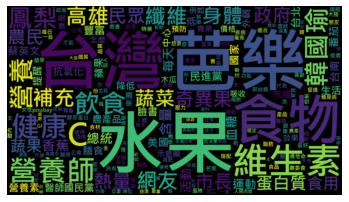

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

wordcloud = WordCloud(font_path='C:/Windows/Fonts/msjhbd.ttc', collocations=False, width=1920, height=1080).generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()